In [1]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np


from scipy.stats import zscore

import pandas as pd

#missing value handle
from sklearn.preprocessing import Imputer

#To shuffle the data set
from sklearn.utils import shuffle
#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report



from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras import optimizers
from keras import losses
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler


import csv

import itertools

import os


import pandas as pd
import io
import requests


Using TensorFlow backend.


In [2]:
# used function


def read_csv_798():
    data_frame_798 = pd.read_csv('data_798.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_798)):
        if(int(data_frame_798["1.0.7"][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_798["1.0.7"][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_798['yes']=yes
    data_frame_798['no']=no
    
    print(len(data_frame_798))
    print(len(yes))
    print(len(no))
    return data_frame_798

def read_csv_834():
    data_frame_834 = pd.read_csv('data_834.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_834)):
        if(int(data_frame_834['1.0.4'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_834['1.0.4'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_834['yes']=yes
    data_frame_834['no']=no
    
    print(len(data_frame_834))
    print(len(yes))
    print(len(no))
    return data_frame_834

def read_csv_835():
    data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
    yes = []
    no = []
    data_frame_m.drop(["Risk Type","low","medium","high"],axis=1,inplace=True)
    data_frame_m = data_frame_m[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
       'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
       'Dyspnea', 'Palpitation', 'ECG','Risk Score', 'IHD-HeartAttack']]
    for i in range(len(data_frame_m)):
        if(int(data_frame_m['IHD-HeartAttack'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_m['IHD-HeartAttack'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_m['yes']=yes
    data_frame_m['no']=no
    
    print(len(data_frame_m))
    print(len(yes))
    print(len(no))
    return data_frame_m


#suffle the data set
def create_data_set(data_frame):
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    data_set = df.values
    return data_set

#when i have delete ECG feature
def x_data_y_data_create(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y


#full data set one label
def x_data_y_data_create_1(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

# without ECG data set one label
def x_data_y_data_create_2(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y


#multi label data set 
def x_data_y_data_create_3(data_set):
    actual_x = data_set[:,:len(data_set[0])-3]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#multi label data set without ECG
def x_data_y_data_create_4(data_set):
    actual_x = data_set[:,:len(data_set[0])-4]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#no ECG feature one label
def x_data_y_data_create_5(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

def split_data(data_set):
    # split into train and test sets
    train_size = int(len(data_set) * 0.75)
    test_size = len(data_set) - train_size   
    train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

    train_x = train[:,:len(data_set[0])-2]
    train_y = train[:,len(data_set[0])-2:]

    test_x = test[:,:len(data_set[0])-2]
    test_y = test[:,len(data_set[0])-2:]

    print(len(train), len(test))
    
    return train_x,train_y,test_x,test_y


def ann_model(input_shape) : 
    model = Sequential([
    Dense(7,kernel_initializer='uniform',input_shape=(input_shape,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    
    ])
    # print(model.summary())
    return(model)

def confussion_matrix_generator(test_y,rounded_predicted_result):
    #rounded_predections = self.model.predict_classes(self.test_x,batch_size=10,verbose=0)
    cm = confusion_matrix(test_y,rounded_predicted_result)
    cm = cm
    cm_plot_labels = ['no ', 'yes']
    print(cm)
    #self.plot_confusion_matrix(cm,cm_plot_labels,title='Confussion Matrix')
    return cm


def ROC_curve_generator(model,X_test):
    #ROC curve

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
def performance():
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    n =TN+FP+FN+TP
    print("numer of total test sample: ",n)

    print("Model Score: ", score)

    accuracy = (TP+TN)/n
    print("accuracy: ",accuracy)

    missclassafication_rate = 1-accuracy
    print("missclassafication_rate: ",missclassafication_rate)

    sensitivity = TP/(TP+FN)
    print("Sensitivity/Recall: ",sensitivity)

    spasificity = TN/(TN+FP)
    print("Spacificity: ",spasificity)

    precition = TP/(FP+TP)
    print("Precition: ",precition)

    prevalence = (FN+TP)/n
    print("prevalence: ",prevalence)

    PPV = TP/(TP+FP)
    print("Positive Predicted Value: ",PPV)

    NPV = TN/(TN+FN)
    print("Negative Predicted Value: ",NPV)

    beta = 0.5
    f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
    print("F Score: ",f_score)
    
    
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [3]:
data_frame_name_list = ['data_798.tab','data_834.tab','RihanSirPreprocess.tab']

keras_optimizers = [
    keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
    keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
    keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
    keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
    keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
    keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
]


keras_loss = [losses.mean_squared_error,
              losses.mean_absolute_error,
              losses.mean_absolute_percentage_error,
              losses.mean_squared_logarithmic_error,
              losses.squared_hinge,
              losses.hinge,
              losses.categorical_hinge,
              losses.logcosh,
              losses.categorical_crossentropy,
              losses.sparse_categorical_crossentropy,
              losses.binary_crossentropy,
              losses.kullback_leibler_divergence,
              losses.poisson,
              losses.cosine_proximity,             
             ]

data_frame = []


batch_size = 30
num_classes = 2
epochs = 5

X_train =[]
Y_train =[]
X_test =[]
Y_test = []

input_size = 0

In [4]:
#data_frame = read_csv_798()

#data_frame = read_csv_834()

data_frame = pd.read_csv('data_834.tab', sep='\t')

#data_frame = read_csv_835()

In [5]:
data_frame.columns

Index(['50.0', '1.0', '0.0', '1.0.1', '0.0.1', '0.0.2', '0.0.3', '0.0.4',
       '1.0.2', '0.0.5', '0.0.6', '0.0.7', '0.0.8', '1.0.3', '1.0.4'],
      dtype='object')

In [6]:
data_frame = data_frame[['50.0', '1.0', '0.0', '1.0.1', '0.0.1', '0.0.2', '0.0.3', '0.0.4',
       '1.0.2', '0.0.5', '0.0.6', '0.0.7', '0.0.8', '1.0.4']]

In [7]:
data_set = create_data_set(data_frame)

In [8]:
for i in data_set:
    print(i)

[52.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.  1.  1.]
[60.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.]
[72.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  1.]
[55.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.]
[40.  2.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[65.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.]
[50.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.]
[50.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[59.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  0.]
[58.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
[30.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[65.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.]
[30.  2.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.]
[49.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
[65.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
[55.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.]
[58.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[44.  2.  0.  

[27.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
[70.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.]
[67.  1.  2.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[25.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.]
[70.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[47.  2.  0.  1.  1.  0.  1.  1.  1.  0.  1.  0.  1.  1.]
[59.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[47.  1.  2.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[70.  1.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.]
[64.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
[50.  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
[65.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.]
[59.  2.  0.  1.  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.]
[45.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[35.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[55.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  1.  0.  1.]
[45.  1.  1.  0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  1.]
[50.  1.  0.  

[40.  2.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.]
[62.  1.  2.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[55.  1.  2.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[85.  2.  0.  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  0.]
[48.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.]
[63.  1.  2.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.]
[26.  1.  0.  1.  0.  0.  0.  1.  1.  0.  1.  1.  0.  1.]
[24.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.]
[68.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[56.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[35.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.]
[35.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.]
[52.  1.  2.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
[45.  1.  2.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.]
[64.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.]
[53.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[75.  2.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]
[48.  1.  0.  

[56.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.]
[35.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  0.  1.]
[31.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.]
[45.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.  1.  0.]
[90.  2.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.]
[57.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[89.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  0.  1.  1.]
[68.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.]
[30.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[48.  2.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.]
[58.  1.  2.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[38.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.]
[60.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.]
[64.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  0.  0.  1.]
[30.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.]
[55.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.]
[51.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  0.]
[40.  1.  0.  

In [9]:
actual_x,actual_y = x_data_y_data_create_5(data_set)

In [10]:
len(data_set[0])

14

In [11]:
len(actual_x[0])

13

In [12]:
len(actual_y[0])

1

# 10 #losses.sparse_categorical_crossentropy,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.6720 - acc: 0.5853 - val_loss: 0.6236 - val_acc: 0.6548
Epoch 2/200
 - 0s - loss: 0.6647 - acc: 0.5960 - val_loss: 0.6386 - val_acc: 0.6548
Epoch 3/200
 - 0s - loss: 0.6643 - acc: 0.5960 - val_loss: 0.6199 - val_acc: 0.6548
Epoch 4/200
 - 0s - loss: 0.6553 - acc: 0.5960 - val_loss: 0.6140 - val_acc: 0.6548
Epoch 5/200
 - 0s - loss: 0.6585 - acc: 0.5973 - val_loss: 0.6152 - val_acc: 0.6548
Epoch 6/200
 - 0s - loss: 0.6512 - acc: 0.6187 - val_loss: 0.6099 - val_acc: 0.6548
Epoch 7/200
 - 0s - loss: 0.6496 - acc: 0.6067 - val_loss: 0.6102 - val_acc: 0.6667
Epoch 8/200
 - 0s - loss: 0.6397 - acc: 0.6227 - val_loss: 0.6044 - val_acc: 0.6667
Epoch 9/200
 - 0s - loss: 0.6305 - acc: 0.6440 - val_loss: 0.6330 - val_acc: 0.7500
Epoch 10/200
 - 0s - loss: 0.6251 - acc: 0.6587 - val_loss: 0.5986 - val_acc: 0.7024
Epoch 11/200
 - 0s - loss: 0.6164 - acc: 0.6853 - val_loss: 0.5891 - val_acc: 0.6786
Epoch 12/200
 - 0s - 

Epoch 97/200
 - 0s - loss: 0.5778 - acc: 0.7133 - val_loss: 0.5731 - val_acc: 0.7262
Epoch 98/200
 - 0s - loss: 0.5775 - acc: 0.7093 - val_loss: 0.5613 - val_acc: 0.7619
Epoch 99/200
 - 0s - loss: 0.5784 - acc: 0.7187 - val_loss: 0.5747 - val_acc: 0.7262
Epoch 100/200
 - 0s - loss: 0.5812 - acc: 0.7173 - val_loss: 0.5657 - val_acc: 0.7500
Epoch 101/200
 - 0s - loss: 0.5759 - acc: 0.7040 - val_loss: 0.5597 - val_acc: 0.7500
Epoch 102/200
 - 0s - loss: 0.5744 - acc: 0.7080 - val_loss: 0.5601 - val_acc: 0.7381
Epoch 103/200
 - 0s - loss: 0.5744 - acc: 0.7200 - val_loss: 0.5816 - val_acc: 0.7024
Epoch 104/200
 - 0s - loss: 0.5702 - acc: 0.7133 - val_loss: 0.6274 - val_acc: 0.6905
Epoch 105/200
 - 0s - loss: 0.5786 - acc: 0.7080 - val_loss: 0.5705 - val_acc: 0.7262
Epoch 106/200
 - 0s - loss: 0.5704 - acc: 0.7213 - val_loss: 0.5624 - val_acc: 0.7262
Epoch 107/200
 - 0s - loss: 0.5793 - acc: 0.7027 - val_loss: 0.5604 - val_acc: 0.7381
Epoch 108/200
 - 0s - loss: 0.5731 - acc: 0.7133 - val_lo

Epoch 193/200
 - 0s - loss: 0.5706 - acc: 0.7227 - val_loss: 0.5686 - val_acc: 0.7381
Epoch 194/200
 - 0s - loss: 0.5688 - acc: 0.7213 - val_loss: 0.5660 - val_acc: 0.7262
Epoch 195/200
 - 0s - loss: 0.5699 - acc: 0.7240 - val_loss: 0.5740 - val_acc: 0.7262
Epoch 196/200
 - 0s - loss: 0.5676 - acc: 0.7227 - val_loss: 0.5997 - val_acc: 0.7143
Epoch 197/200
 - 0s - loss: 0.5669 - acc: 0.7293 - val_loss: 0.5646 - val_acc: 0.7143
Epoch 198/200
 - 0s - loss: 0.5700 - acc: 0.7253 - val_loss: 0.5740 - val_acc: 0.7262
Epoch 199/200
 - 0s - loss: 0.5683 - acc: 0.7200 - val_loss: 0.5671 - val_acc: 0.7381
Epoch 200/200
 - 0s - loss: 0.5672 - acc: 0.7213 - val_loss: 0.5738 - val_acc: 0.7262


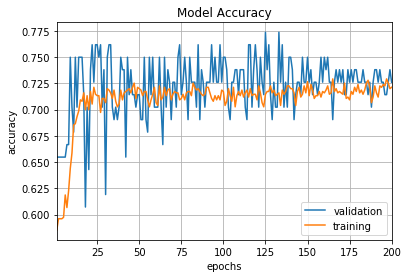

84/84 [==============================] - 0s 56us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.5738182976132348, 0.7261904790287926]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 1.2514 - acc: 0.4320 - val_loss: 0.6808 - val_acc: 0.6310
Epoch 2/200
 - 0s - loss: 0.6726 - acc: 0.6187 - val_loss: 0.6725 - val_acc: 0.6190
Epoch 3/200
 - 0s - loss: 0.6681 - acc: 0.6200 - val_loss: 0.6723 - val_acc: 0.6190
Epoch 4/200
 - 0s - loss: 0.6650 - acc: 0.6053 - val_loss: 0.6662 - val_acc: 0.6190
Epoch 5/200
 - 0s - loss: 0.6664 - acc: 0.6133 - val_loss: 0.6636 - val_acc: 0.6190
Epoch 6/200
 - 0s - loss: 0.6614 - acc: 0.6160 - val_loss: 0.6639 - val_acc: 0.6190
Epoch 7/200
 - 0s - loss: 0.6490 - acc: 0.6280 - val_loss: 0.6571 - val_acc: 0.6190
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.5611 - acc: 0.7200 - val_loss: 0.6433 - val_acc: 0.6190
Epoch 94/200
 - 0s - loss: 0.5551 - acc: 0.7253 - val_loss: 0.6196 - val_acc: 0.6905
Epoch 95/200
 - 0s - loss: 0.5583 - acc: 0.7213 - val_loss: 0.6373 - val_acc: 0.6190
Epoch 96/200
 - 0s - loss: 0.5535 - acc: 0.7400 - val_loss: 0.6959 - val_acc: 0.6190
Epoch 97/200
 - 0s - loss: 0.5655 - acc: 0.7067 - val_loss: 0.6452 - val_acc: 0.6310
Epoch 98/200
 - 0s - loss: 0.5629 - acc: 0.7240 - val_loss: 0.6424 - val_acc: 0.6190
Epoch 99/200
 - 0s - loss: 0.5555 - acc: 0.7427 - val_loss: 0.6120 - val_acc: 0.6905
Epoch 100/200
 - 0s - loss: 0.5634 - acc: 0.7093 - val_loss: 0.6403 - val_acc: 0.6190
Epoch 101/200
 - 0s - loss: 0.5576 - acc: 0.7280 - val_loss: 0.6399 - val_acc: 0.6190
Epoch 102/200
 - 0s - loss: 0.5576 - acc: 0.7187 - val_loss: 0.6329 - val_acc: 0.6310
Epoch 103/200
 - 0s - loss: 0.5543 - acc: 0.7200 - val_loss: 0.6808 - val_acc: 0.6071
Epoch 104/200
 - 0s - loss: 0.5610 - acc: 0.7253 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5553 - acc: 0.7213 - val_loss: 0.6634 - val_acc: 0.6071
Epoch 190/200
 - 0s - loss: 0.5531 - acc: 0.7280 - val_loss: 0.6214 - val_acc: 0.7024
Epoch 191/200
 - 0s - loss: 0.5553 - acc: 0.7267 - val_loss: 0.6546 - val_acc: 0.5833
Epoch 192/200
 - 0s - loss: 0.5544 - acc: 0.7200 - val_loss: 0.6211 - val_acc: 0.7024
Epoch 193/200
 - 0s - loss: 0.5526 - acc: 0.7200 - val_loss: 0.6352 - val_acc: 0.6190
Epoch 194/200
 - 0s - loss: 0.5511 - acc: 0.7240 - val_loss: 0.6313 - val_acc: 0.6310
Epoch 195/200
 - 0s - loss: 0.5553 - acc: 0.7253 - val_loss: 0.6497 - val_acc: 0.5952
Epoch 196/200
 - 0s - loss: 0.5491 - acc: 0.7280 - val_loss: 0.6307 - val_acc: 0.6190
Epoch 197/200
 - 0s - loss: 0.5493 - acc: 0.7160 - val_loss: 0.6365 - val_acc: 0.6190
Epoch 198/200
 - 0s - loss: 0.5510 - acc: 0.7267 - val_loss: 0.6405 - val_acc: 0.5833
Epoch 199/200
 - 0s - loss: 0.5549 - acc: 0.7280 - val_loss: 0.6265 - val_acc: 0.6667
Epoch 200/200
 - 0s - loss: 0.5528 - acc: 0.7360 - val

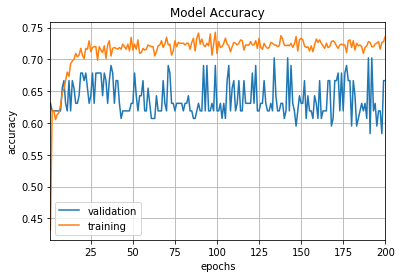

84/84 [==============================] - 0s 104us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.6263903677463531, 0.6666666695049831]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.7070 - acc: 0.5987 - val_loss: 0.6979 - val_acc: 0.5476
Epoch 2/200
 - 0s - loss: 0.6677 - acc: 0.6000 - val_loss: 0.7031 - val_acc: 0.5714
Epoch 3/200
 - 0s - loss: 0.6546 - acc: 0.6200 - val_loss: 0.7051 - val_acc: 0.5595
Epoch 4/200
 - 0s - loss: 0.6604 - acc: 0.5987 - val_loss: 0.7164 - val_acc: 0.5714
Epoch 5/200
 - 0s - loss: 0.6440 - acc: 0.6347 - val_loss: 0.7021 - val_acc: 0.5595
Epoch 6/200
 - 0s - loss: 0.6441 - acc: 0.6293 - val_loss: 0.6558 - val_acc: 0.5833
Epoch 7/200
 - 0s - loss: 0.6405 - acc: 0.6400 - val_loss: 0.6414 - val_acc: 0.6429
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5810 - acc: 0.7107 - val_loss: 0.5500 - val_acc: 0.7738
Epoch 94/200
 - 0s - loss: 0.5793 - acc: 0.7067 - val_loss: 0.5495 - val_acc: 0.7738
Epoch 95/200
 - 0s - loss: 0.5855 - acc: 0.7120 - val_loss: 0.5384 - val_acc: 0.7857
Epoch 96/200
 - 0s - loss: 0.5852 - acc: 0.7053 - val_loss: 0.5447 - val_acc: 0.7738
Epoch 97/200
 - 0s - loss: 0.5765 - acc: 0.7160 - val_loss: 0.5420 - val_acc: 0.7619
Epoch 98/200
 - 0s - loss: 0.5741 - acc: 0.7173 - val_loss: 0.5378 - val_acc: 0.7857
Epoch 99/200
 - 0s - loss: 0.5793 - acc: 0.7000 - val_loss: 0.5519 - val_acc: 0.7738
Epoch 100/200
 - 0s - loss: 0.5846 - acc: 0.6920 - val_loss: 0.5370 - val_acc: 0.7976
Epoch 101/200
 - 0s - loss: 0.5803 - acc: 0.6987 - val_loss: 0.5385 - val_acc: 0.7738
Epoch 102/200
 - 0s - loss: 0.5744 - acc: 0.7093 - val_loss: 0.5400 - val_acc: 0.7619
Epoch 103/200
 - 0s - loss: 0.5765 - acc: 0.7173 - val_loss: 0.5373 - val_acc: 0.7857
Epoch 104/200
 - 0s - loss: 0.5847 - acc: 0.6973 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5693 - acc: 0.7080 - val_loss: 0.5467 - val_acc: 0.7738
Epoch 190/200
 - 0s - loss: 0.5676 - acc: 0.7120 - val_loss: 0.5550 - val_acc: 0.7381
Epoch 191/200
 - 0s - loss: 0.5679 - acc: 0.7080 - val_loss: 0.5353 - val_acc: 0.7857
Epoch 192/200
 - 0s - loss: 0.5690 - acc: 0.7080 - val_loss: 0.5321 - val_acc: 0.7738
Epoch 193/200
 - 0s - loss: 0.5661 - acc: 0.7160 - val_loss: 0.5468 - val_acc: 0.7619
Epoch 194/200
 - 0s - loss: 0.5659 - acc: 0.7133 - val_loss: 0.5348 - val_acc: 0.7619
Epoch 195/200
 - 0s - loss: 0.5669 - acc: 0.7147 - val_loss: 0.5351 - val_acc: 0.7619
Epoch 196/200
 - 0s - loss: 0.5686 - acc: 0.7120 - val_loss: 0.5367 - val_acc: 0.7738
Epoch 197/200
 - 0s - loss: 0.5652 - acc: 0.7120 - val_loss: 0.5477 - val_acc: 0.7500
Epoch 198/200
 - 0s - loss: 0.5674 - acc: 0.7173 - val_loss: 0.5374 - val_acc: 0.7738
Epoch 199/200
 - 0s - loss: 0.5653 - acc: 0.7227 - val_loss: 0.5334 - val_acc: 0.7738
Epoch 200/200
 - 0s - loss: 0.5663 - acc: 0.7080 - val

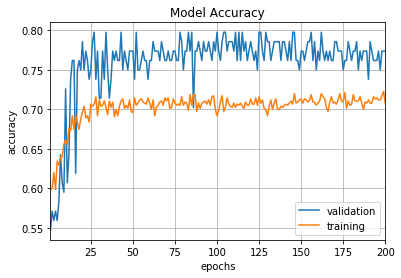

84/84 [==============================] - 0s 134us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.5335397833869571, 0.7738095238095238]
 best Score: 0.7738095238095238          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.6751 - acc: 0.6027 - val_loss: 0.6548 - val_acc: 0.5952
Epoch 2/200
 - 0s - loss: 0.6546 - acc: 0.6040 - val_loss: 0.6517 - val_acc: 0.5952
Epoch 3/200
 - 0s - loss: 0.6509 - acc: 0.6027 - val_loss: 0.6469 - val_acc: 0.5952
Epoch 4/200
 - 0s - loss: 0.6512 - acc: 0.6093 - val_loss: 0.6490 - val_acc: 0.5952
Epoch 5/200
 - 0s - loss: 0.6463 - acc: 0.6120 - val_loss: 0.6489 - val_acc: 0.6548
Epoch 6/200
 - 0s - loss: 0.6405 - acc: 0.6373 - val_loss: 0.6397 - val_acc: 0.6190
Epoch 7/200
 - 0s - loss: 0.6373 - acc: 0.6253 - val_loss: 0.6344 - val_acc: 0.6310
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5657 - acc: 0.7040 - val_loss: 0.6389 - val_acc: 0.6786
Epoch 94/200
 - 0s - loss: 0.5637 - acc: 0.7107 - val_loss: 0.6391 - val_acc: 0.6786
Epoch 95/200
 - 0s - loss: 0.5619 - acc: 0.7267 - val_loss: 0.6376 - val_acc: 0.6786
Epoch 96/200
 - 0s - loss: 0.5642 - acc: 0.7160 - val_loss: 0.6281 - val_acc: 0.6667
Epoch 97/200
 - 0s - loss: 0.5676 - acc: 0.7173 - val_loss: 0.6309 - val_acc: 0.6667
Epoch 98/200
 - 0s - loss: 0.5612 - acc: 0.7320 - val_loss: 0.6331 - val_acc: 0.6548
Epoch 99/200
 - 0s - loss: 0.5679 - acc: 0.7173 - val_loss: 0.6410 - val_acc: 0.6667
Epoch 100/200
 - 0s - loss: 0.5685 - acc: 0.7133 - val_loss: 0.6306 - val_acc: 0.6548
Epoch 101/200
 - 0s - loss: 0.5621 - acc: 0.7293 - val_loss: 0.6443 - val_acc: 0.6786
Epoch 102/200
 - 0s - loss: 0.5676 - acc: 0.7227 - val_loss: 0.6310 - val_acc: 0.6905
Epoch 103/200
 - 0s - loss: 0.5678 - acc: 0.7267 - val_loss: 0.6309 - val_acc: 0.6667
Epoch 104/200
 - 0s - loss: 0.5636 - acc: 0.7240 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5513 - acc: 0.7173 - val_loss: 0.6390 - val_acc: 0.6667
Epoch 190/200
 - 0s - loss: 0.5546 - acc: 0.7307 - val_loss: 0.6518 - val_acc: 0.6786
Epoch 191/200
 - 0s - loss: 0.5542 - acc: 0.7280 - val_loss: 0.6568 - val_acc: 0.6667
Epoch 192/200
 - 0s - loss: 0.5505 - acc: 0.7200 - val_loss: 0.6439 - val_acc: 0.6667
Epoch 193/200
 - 0s - loss: 0.5529 - acc: 0.7227 - val_loss: 0.6393 - val_acc: 0.6905
Epoch 194/200
 - 0s - loss: 0.5568 - acc: 0.7133 - val_loss: 0.6405 - val_acc: 0.6667
Epoch 195/200
 - 0s - loss: 0.5557 - acc: 0.7280 - val_loss: 0.6412 - val_acc: 0.6667
Epoch 196/200
 - 0s - loss: 0.5518 - acc: 0.7373 - val_loss: 0.6407 - val_acc: 0.6548
Epoch 197/200
 - 0s - loss: 0.5518 - acc: 0.7253 - val_loss: 0.6410 - val_acc: 0.6548
Epoch 198/200
 - 0s - loss: 0.5515 - acc: 0.7293 - val_loss: 0.6369 - val_acc: 0.6667
Epoch 199/200
 - 0s - loss: 0.5502 - acc: 0.7280 - val_loss: 0.6482 - val_acc: 0.6667
Epoch 200/200
 - 0s - loss: 0.5539 - acc: 0.7267 - val

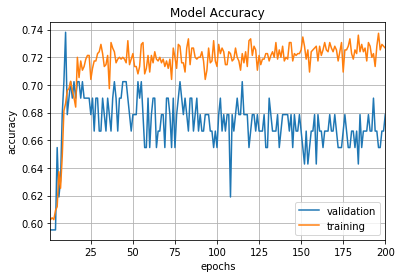

84/84 [==============================] - 0s 94us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.6380892168907892, 0.6785714228947958]
 best Score: 0.7738095238095238          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 2/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 3/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 4/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 5/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 6/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 7/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epo

Epoch 92/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 93/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 94/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 95/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 96/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 97/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 98/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 99/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 100/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 101/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 102/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 103/200
 - 0s - loss: 9.5936 - acc: 0.4048 - 

Epoch 187/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 188/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 189/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 190/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 191/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 192/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 193/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 194/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 195/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 196/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 197/200
 - 0s - loss: 9.5936 - acc: 0.4048 - val_loss: 10.6807 - val_acc: 0.3373
Epoch 198/200
 - 0s - loss: 9.5936 - acc: 0

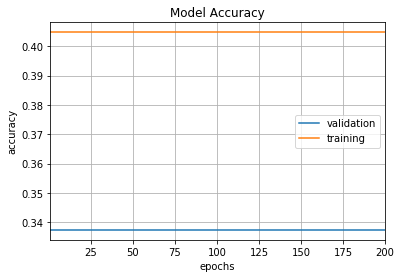

83/83 [==============================] - 0s 132us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [10.680665481521423, 0.3373493968722332]
 best Score: 0.7738095238095238          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.6882 - acc: 0.6072 - val_loss: 0.6705 - val_acc: 0.5542
Epoch 2/200
 - 0s - loss: 0.6609 - acc: 0.6072 - val_loss: 0.6661 - val_acc: 0.5542
Epoch 3/200
 - 0s - loss: 0.6601 - acc: 0.6072 - val_loss: 0.6608 - val_acc: 0.5542
Epoch 4/200
 - 0s - loss: 0.6531 - acc: 0.6085 - val_loss: 0.6593 - val_acc: 0.6145
Epoch 5/200
 - 0s - loss: 0.6536 - acc: 0.6125 - val_loss: 0.6525 - val_acc: 0.5542
Epoch 6/200
 - 0s - loss: 0.6499 - acc: 0.6152 - val_loss: 0.6444 - val_acc: 0.5542
Epoch 7/200
 - 0s - loss: 0.6464 - acc: 0.6112 - val_loss: 0.6410 - val_acc: 0.5542
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5788 - acc: 0.7217 - val_loss: 0.5239 - val_acc: 0.7349
Epoch 94/200
 - 0s - loss: 0.5794 - acc: 0.7164 - val_loss: 0.5239 - val_acc: 0.7349
Epoch 95/200
 - 0s - loss: 0.5772 - acc: 0.7217 - val_loss: 0.5223 - val_acc: 0.7831
Epoch 96/200
 - 0s - loss: 0.5843 - acc: 0.7097 - val_loss: 0.5226 - val_acc: 0.7590
Epoch 97/200
 - 0s - loss: 0.5766 - acc: 0.7150 - val_loss: 0.5200 - val_acc: 0.7590
Epoch 98/200
 - 0s - loss: 0.5817 - acc: 0.7071 - val_loss: 0.5254 - val_acc: 0.7470
Epoch 99/200
 - 0s - loss: 0.5762 - acc: 0.7177 - val_loss: 0.5316 - val_acc: 0.7349
Epoch 100/200
 - 0s - loss: 0.5791 - acc: 0.7124 - val_loss: 0.5222 - val_acc: 0.7470
Epoch 101/200
 - 0s - loss: 0.5810 - acc: 0.7164 - val_loss: 0.5394 - val_acc: 0.7470
Epoch 102/200
 - 0s - loss: 0.5891 - acc: 0.7017 - val_loss: 0.5470 - val_acc: 0.7108
Epoch 103/200
 - 0s - loss: 0.5795 - acc: 0.7124 - val_loss: 0.5351 - val_acc: 0.7349
Epoch 104/200
 - 0s - loss: 0.5737 - acc: 0.7124 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5798 - acc: 0.7084 - val_loss: 0.5306 - val_acc: 0.7711
Epoch 190/200
 - 0s - loss: 0.5736 - acc: 0.7190 - val_loss: 0.5401 - val_acc: 0.7470
Epoch 191/200
 - 0s - loss: 0.5731 - acc: 0.7164 - val_loss: 0.5290 - val_acc: 0.7711
Epoch 192/200
 - 0s - loss: 0.5748 - acc: 0.7031 - val_loss: 0.5406 - val_acc: 0.7470
Epoch 193/200
 - 0s - loss: 0.5721 - acc: 0.7084 - val_loss: 0.5644 - val_acc: 0.7108
Epoch 194/200
 - 0s - loss: 0.5735 - acc: 0.7217 - val_loss: 0.5448 - val_acc: 0.7470
Epoch 195/200
 - 0s - loss: 0.5738 - acc: 0.7164 - val_loss: 0.5423 - val_acc: 0.7349
Epoch 196/200
 - 0s - loss: 0.5744 - acc: 0.7071 - val_loss: 0.5476 - val_acc: 0.7470
Epoch 197/200
 - 0s - loss: 0.5695 - acc: 0.7177 - val_loss: 0.5322 - val_acc: 0.7711
Epoch 198/200
 - 0s - loss: 0.5744 - acc: 0.7084 - val_loss: 0.5403 - val_acc: 0.7470
Epoch 199/200
 - 0s - loss: 0.5715 - acc: 0.7230 - val_loss: 0.5377 - val_acc: 0.7470
Epoch 200/200
 - 0s - loss: 0.5717 - acc: 0.7137 - val

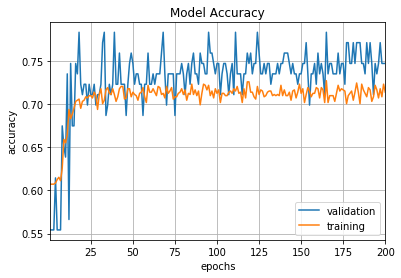

83/83 [==============================] - 0s 106us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.5341886895966818, 0.7469879532434854]
 best Score: 0.7738095238095238          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 3.0178 - acc: 0.6045 - val_loss: 1.8611 - val_acc: 0.5783
Epoch 2/200
 - 0s - loss: 1.2000 - acc: 0.6045 - val_loss: 0.9278 - val_acc: 0.5783
Epoch 3/200
 - 0s - loss: 0.7690 - acc: 0.6045 - val_loss: 0.7268 - val_acc: 0.5783
Epoch 4/200
 - 0s - loss: 0.6783 - acc: 0.6059 - val_loss: 0.6758 - val_acc: 0.5783
Epoch 5/200
 - 0s - loss: 0.6572 - acc: 0.6125 - val_loss: 0.6627 - val_acc: 0.5783
Epoch 6/200
 - 0s - loss: 0.6531 - acc: 0.6125 - val_loss: 0.6580 - val_acc: 0.5783
Epoch 7/200
 - 0s - loss: 0.6505 - acc: 0.6232 - val_loss: 0.6558 - val_acc: 0.5904
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5671 - acc: 0.7204 - val_loss: 0.5810 - val_acc: 0.6988
Epoch 94/200
 - 0s - loss: 0.5687 - acc: 0.7284 - val_loss: 0.5746 - val_acc: 0.6988
Epoch 95/200
 - 0s - loss: 0.5649 - acc: 0.7230 - val_loss: 0.5738 - val_acc: 0.6867
Epoch 96/200
 - 0s - loss: 0.5664 - acc: 0.7137 - val_loss: 0.5754 - val_acc: 0.6988
Epoch 97/200
 - 0s - loss: 0.5668 - acc: 0.7217 - val_loss: 0.5750 - val_acc: 0.6988
Epoch 98/200
 - 0s - loss: 0.5674 - acc: 0.7244 - val_loss: 0.5748 - val_acc: 0.6988
Epoch 99/200
 - 0s - loss: 0.5649 - acc: 0.7217 - val_loss: 0.5774 - val_acc: 0.6988
Epoch 100/200
 - 0s - loss: 0.5687 - acc: 0.7297 - val_loss: 0.5848 - val_acc: 0.6988
Epoch 101/200
 - 0s - loss: 0.5680 - acc: 0.7150 - val_loss: 0.5747 - val_acc: 0.7108
Epoch 102/200
 - 0s - loss: 0.5638 - acc: 0.7204 - val_loss: 0.5762 - val_acc: 0.6988
Epoch 103/200
 - 0s - loss: 0.5696 - acc: 0.7217 - val_loss: 0.5806 - val_acc: 0.6867
Epoch 104/200
 - 0s - loss: 0.5652 - acc: 0.7284 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5511 - acc: 0.7270 - val_loss: 0.5952 - val_acc: 0.6747
Epoch 190/200
 - 0s - loss: 0.5533 - acc: 0.7230 - val_loss: 0.5954 - val_acc: 0.6747
Epoch 191/200
 - 0s - loss: 0.5523 - acc: 0.7270 - val_loss: 0.5952 - val_acc: 0.6747
Epoch 192/200
 - 0s - loss: 0.5567 - acc: 0.7190 - val_loss: 0.5998 - val_acc: 0.6988
Epoch 193/200
 - 0s - loss: 0.5526 - acc: 0.7364 - val_loss: 0.6020 - val_acc: 0.7229
Epoch 194/200
 - 0s - loss: 0.5574 - acc: 0.7270 - val_loss: 0.5963 - val_acc: 0.6988
Epoch 195/200
 - 0s - loss: 0.5544 - acc: 0.7204 - val_loss: 0.5983 - val_acc: 0.6747
Epoch 196/200
 - 0s - loss: 0.5569 - acc: 0.7150 - val_loss: 0.6008 - val_acc: 0.6747
Epoch 197/200
 - 0s - loss: 0.5500 - acc: 0.7337 - val_loss: 0.6000 - val_acc: 0.6867
Epoch 198/200
 - 0s - loss: 0.5553 - acc: 0.7217 - val_loss: 0.5962 - val_acc: 0.6867
Epoch 199/200
 - 0s - loss: 0.5498 - acc: 0.7284 - val_loss: 0.6130 - val_acc: 0.6867
Epoch 200/200
 - 0s - loss: 0.5598 - acc: 0.7270 - val

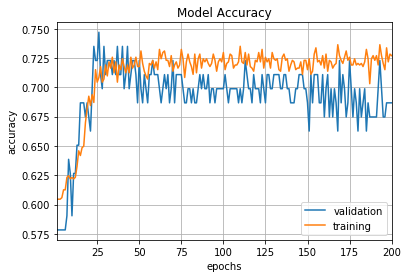

83/83 [==============================] - 0s 93us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.602419907070068, 0.6867469908243202]
 best Score: 0.7738095238095238          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.6886 - acc: 0.5939 - val_loss: 0.6854 - val_acc: 0.5783
Epoch 2/200
 - 0s - loss: 0.6778 - acc: 0.6045 - val_loss: 0.6813 - val_acc: 0.5783
Epoch 3/200
 - 0s - loss: 0.6727 - acc: 0.6045 - val_loss: 0.6810 - val_acc: 0.5783
Epoch 4/200
 - 0s - loss: 0.6718 - acc: 0.6045 - val_loss: 0.6812 - val_acc: 0.5783
Epoch 5/200
 - 0s - loss: 0.6714 - acc: 0.6045 - val_loss: 0.6816 - val_acc: 0.5783
Epoch 6/200
 - 0s - loss: 0.6718 - acc: 0.6045 - val_loss: 0.6815 - val_acc: 0.5783
Epoch 7/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6826 - val_acc: 0.5783
Epoch 8/200

Epoch 93/200
 - 0s - loss: 0.6688 - acc: 0.6072 - val_loss: 0.6821 - val_acc: 0.5783
Epoch 94/200
 - 0s - loss: 0.6689 - acc: 0.6072 - val_loss: 0.6824 - val_acc: 0.5783
Epoch 95/200
 - 0s - loss: 0.6690 - acc: 0.6072 - val_loss: 0.6825 - val_acc: 0.5783
Epoch 96/200
 - 0s - loss: 0.6689 - acc: 0.6072 - val_loss: 0.6823 - val_acc: 0.5783
Epoch 97/200
 - 0s - loss: 0.6689 - acc: 0.6072 - val_loss: 0.6823 - val_acc: 0.5783
Epoch 98/200
 - 0s - loss: 0.6694 - acc: 0.6072 - val_loss: 0.6826 - val_acc: 0.5783
Epoch 99/200
 - 0s - loss: 0.6690 - acc: 0.6072 - val_loss: 0.6825 - val_acc: 0.5783
Epoch 100/200
 - 0s - loss: 0.6689 - acc: 0.6072 - val_loss: 0.6821 - val_acc: 0.5783
Epoch 101/200
 - 0s - loss: 0.6690 - acc: 0.6072 - val_loss: 0.6826 - val_acc: 0.5783
Epoch 102/200
 - 0s - loss: 0.6690 - acc: 0.6072 - val_loss: 0.6823 - val_acc: 0.5783
Epoch 103/200
 - 0s - loss: 0.6689 - acc: 0.6072 - val_loss: 0.6828 - val_acc: 0.5783
Epoch 104/200
 - 0s - loss: 0.6690 - acc: 0.6072 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6689 - acc: 0.6072 - val_loss: 0.6830 - val_acc: 0.5783
Epoch 190/200
 - 0s - loss: 0.6689 - acc: 0.6072 - val_loss: 0.6828 - val_acc: 0.5783
Epoch 191/200
 - 0s - loss: 0.6689 - acc: 0.6072 - val_loss: 0.6823 - val_acc: 0.5783
Epoch 192/200
 - 0s - loss: 0.6689 - acc: 0.6072 - val_loss: 0.6826 - val_acc: 0.5783
Epoch 193/200
 - 0s - loss: 0.6689 - acc: 0.6072 - val_loss: 0.6827 - val_acc: 0.5783
Epoch 194/200
 - 0s - loss: 0.6688 - acc: 0.6072 - val_loss: 0.6827 - val_acc: 0.5783
Epoch 195/200
 - 0s - loss: 0.6690 - acc: 0.6072 - val_loss: 0.6831 - val_acc: 0.5783
Epoch 196/200
 - 0s - loss: 0.6690 - acc: 0.6072 - val_loss: 0.6824 - val_acc: 0.5783
Epoch 197/200
 - 0s - loss: 0.6691 - acc: 0.6072 - val_loss: 0.6828 - val_acc: 0.5783
Epoch 198/200
 - 0s - loss: 0.6690 - acc: 0.6072 - val_loss: 0.6828 - val_acc: 0.5783
Epoch 199/200
 - 0s - loss: 0.6688 - acc: 0.6072 - val_loss: 0.6824 - val_acc: 0.5783
Epoch 200/200
 - 0s - loss: 0.6689 - acc: 0.6072 - val

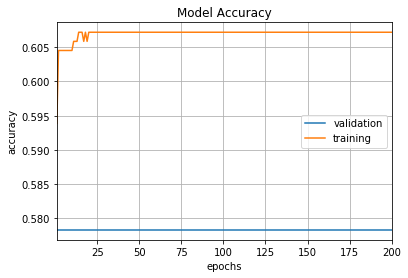

83/83 [==============================] - 0s 122us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.6824701916740601, 0.5783132573208177]
 best Score: 0.7738095238095238          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 2s - loss: 4.2835 - acc: 0.4527 - val_loss: 0.6462 - val_acc: 0.6506
Epoch 2/200
 - 0s - loss: 0.6682 - acc: 0.5952 - val_loss: 0.6309 - val_acc: 0.6506
Epoch 3/200
 - 0s - loss: 0.6603 - acc: 0.5965 - val_loss: 0.6211 - val_acc: 0.6506
Epoch 4/200
 - 0s - loss: 0.6566 - acc: 0.5992 - val_loss: 0.6027 - val_acc: 0.6506
Epoch 5/200
 - 0s - loss: 0.6500 - acc: 0.6272 - val_loss: 0.5983 - val_acc: 0.6506
Epoch 6/200
 - 0s - loss: 0.6400 - acc: 0.6298 - val_loss: 0.5824 - val_acc: 0.6506
Epoch 7/200
 - 0s - loss: 0.6338 - acc: 0.6365 - val_loss: 0.5722 - val_acc: 0.6747
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5750 - acc: 0.7124 - val_loss: 0.5302 - val_acc: 0.7470
Epoch 94/200
 - 0s - loss: 0.5720 - acc: 0.7217 - val_loss: 0.5271 - val_acc: 0.7470
Epoch 95/200
 - 0s - loss: 0.5744 - acc: 0.7031 - val_loss: 0.5360 - val_acc: 0.7349
Epoch 96/200
 - 0s - loss: 0.5706 - acc: 0.7137 - val_loss: 0.5512 - val_acc: 0.7108
Epoch 97/200
 - 0s - loss: 0.5812 - acc: 0.7111 - val_loss: 0.5236 - val_acc: 0.7349
Epoch 98/200
 - 0s - loss: 0.5744 - acc: 0.7190 - val_loss: 0.5263 - val_acc: 0.7349
Epoch 99/200
 - 0s - loss: 0.5719 - acc: 0.7084 - val_loss: 0.5473 - val_acc: 0.7349
Epoch 100/200
 - 0s - loss: 0.5780 - acc: 0.7150 - val_loss: 0.5347 - val_acc: 0.7349
Epoch 101/200
 - 0s - loss: 0.5784 - acc: 0.7071 - val_loss: 0.5291 - val_acc: 0.7349
Epoch 102/200
 - 0s - loss: 0.5783 - acc: 0.7150 - val_loss: 0.5295 - val_acc: 0.7349
Epoch 103/200
 - 0s - loss: 0.5797 - acc: 0.7071 - val_loss: 0.5827 - val_acc: 0.7470
Epoch 104/200
 - 0s - loss: 0.5771 - acc: 0.7111 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5695 - acc: 0.7310 - val_loss: 0.5465 - val_acc: 0.7470
Epoch 190/200
 - 0s - loss: 0.5639 - acc: 0.7230 - val_loss: 0.5394 - val_acc: 0.7229
Epoch 191/200
 - 0s - loss: 0.5646 - acc: 0.7124 - val_loss: 0.5409 - val_acc: 0.7349
Epoch 192/200
 - 0s - loss: 0.5618 - acc: 0.7257 - val_loss: 0.5437 - val_acc: 0.7349
Epoch 193/200
 - 0s - loss: 0.5655 - acc: 0.7390 - val_loss: 0.5475 - val_acc: 0.7349
Epoch 194/200
 - 0s - loss: 0.5706 - acc: 0.7177 - val_loss: 0.5393 - val_acc: 0.7229
Epoch 195/200
 - 0s - loss: 0.5688 - acc: 0.7124 - val_loss: 0.5375 - val_acc: 0.7470
Epoch 196/200
 - 0s - loss: 0.5675 - acc: 0.7217 - val_loss: 0.5337 - val_acc: 0.7349
Epoch 197/200
 - 0s - loss: 0.5705 - acc: 0.7150 - val_loss: 0.5326 - val_acc: 0.7349
Epoch 198/200
 - 0s - loss: 0.5647 - acc: 0.7257 - val_loss: 0.5313 - val_acc: 0.7470
Epoch 199/200
 - 0s - loss: 0.5663 - acc: 0.7217 - val_loss: 0.5350 - val_acc: 0.7470
Epoch 200/200
 - 0s - loss: 0.5673 - acc: 0.7217 - val

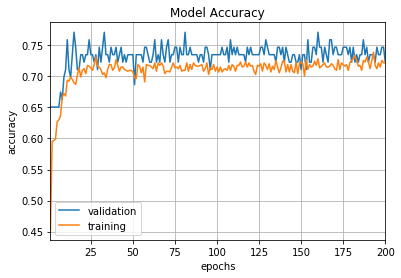

83/83 [==============================] - 0s 118us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.5332100879715149, 0.7228915727282145]
 best Score: 0.7738095238095238          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 2s - loss: 0.6892 - acc: 0.6005 - val_loss: 0.6861 - val_acc: 0.5904
Epoch 2/200
 - 0s - loss: 0.6826 - acc: 0.6032 - val_loss: 0.6823 - val_acc: 0.5904
Epoch 3/200
 - 0s - loss: 0.6786 - acc: 0.6032 - val_loss: 0.6796 - val_acc: 0.5904
Epoch 4/200
 - 0s - loss: 0.6759 - acc: 0.6032 - val_loss: 0.6783 - val_acc: 0.5904
Epoch 5/200
 - 0s - loss: 0.6742 - acc: 0.6032 - val_loss: 0.6774 - val_acc: 0.5904
Epoch 6/200
 - 0s - loss: 0.6733 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 7/200
 - 0s - loss: 0.6726 - acc: 0.6032 - val_loss: 0.6768 - val_acc: 0.5904
Epoch 8/

Epoch 93/200
 - 0s - loss: 0.6717 - acc: 0.6032 - val_loss: 0.6771 - val_acc: 0.5904
Epoch 94/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6772 - val_acc: 0.5904
Epoch 95/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 96/200
 - 0s - loss: 0.6717 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 97/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6769 - val_acc: 0.5904
Epoch 98/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6769 - val_acc: 0.5904
Epoch 99/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6771 - val_acc: 0.5904
Epoch 100/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 101/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 102/200
 - 0s - loss: 0.6720 - acc: 0.6032 - val_loss: 0.6771 - val_acc: 0.5904
Epoch 103/200
 - 0s - loss: 0.6720 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 104/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6771 - val_acc: 0.5904
Epoch 190/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 191/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 192/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6769 - val_acc: 0.5904
Epoch 193/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6769 - val_acc: 0.5904
Epoch 194/200
 - 0s - loss: 0.6720 - acc: 0.6032 - val_loss: 0.6768 - val_acc: 0.5904
Epoch 195/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 196/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6769 - val_acc: 0.5904
Epoch 197/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6769 - val_acc: 0.5904
Epoch 198/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 199/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 200/200
 - 0s - loss: 0.6718 - acc: 0.6032 - val

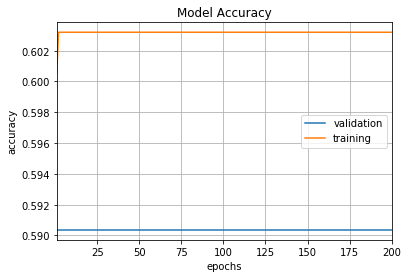

83/83 [==============================] - 0s 81us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.6770915073084544, 0.5903614436287478]
 best Score: 0.7738095238095238          
-------------------------------------------------------------------------------------------




In [13]:
batch_size = 10
num_classes = 2
epochs = 200

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.sparse_categorical_crossentropy,
                  optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [14]:
print("accuracy")
best__acc_score = 0.0
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    if(i>best__acc_score):
        best__acc_score = i
    avg_accuracy_score += i

print(best__acc_score)
print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

accuracy
0.7359999978542328
0.6669629841320948


[0.7213333340485891,
 0.7359999978542328,
 0.7080000023047129,
 0.7266666646798452,
 0.4047936142562391,
 0.713715048191868,
 0.727030626625894,
 0.6071904160766881,
 0.7217043940617781,
 0.6031957432211001]

In [15]:
print("validation ")
print(best_score)

#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

validation 
0.7738095238095238
0.6507888709855914


[[0.5738182976132348, 0.7261904790287926],
 [0.6263903677463531, 0.6666666695049831],
 [0.5335397833869571, 0.7738095238095238],
 [0.6380892168907892, 0.6785714228947958],
 [10.680665481521423, 0.3373493968722332],
 [0.5341886895966818, 0.7469879532434854],
 [0.602419907070068, 0.6867469908243202],
 [0.6824701916740601, 0.5783132573208177],
 [0.5332100879715149, 0.7228915727282145],
 [0.6770915073084544, 0.5903614436287478]]

In [16]:
kfold_validation_score_store

[[0.5738182976132348, 0.7261904790287926],
 [0.6263903677463531, 0.6666666695049831],
 [0.5335397833869571, 0.7738095238095238],
 [0.6380892168907892, 0.6785714228947958],
 [10.680665481521423, 0.3373493968722332],
 [0.5341886895966818, 0.7469879532434854],
 [0.602419907070068, 0.6867469908243202],
 [0.6824701916740601, 0.5783132573208177],
 [0.5332100879715149, 0.7228915727282145],
 [0.6770915073084544, 0.5903614436287478]]